<p style="padding: 10px; border: 1px solid black;">
<img src="images/MLU-NEW-logo.png" alt="drawing" width="400"/> <br/>


# <a name="0">MLU LangChain Workshop </a>
## <a name="0">Lab 4: Langchain Agents </a>

In this notebook, we use an LLM's reasoning capabilities to plan and execute actions in order to solve a task. 
    We will be using [LangChain tools](https://python.langchain.com/docs/modules/agents/tools/) to allow LLMs to interface with external sources. Tools are functions or APIs which helps provides the LLM with the relevant context. We will be examining some popular built-in tool integrations in this notebook.
    Agents harness the reasoning capabilities of LLMs to plan actions to solve the task. LangChain agents have the capability to not only plan but also execute the actions decided upon. An agent can be given access to tools which the agent may select to solve the task. In this notebook we will develop custom agents with access to certain tools, and observe how the agent selects the appropriate tool, retrieves the results using the selected tool and produces the final response.
    

1. <a href="#1">Import libraries</a>
2. <a href="#2">Define the Bedrock Model for Inference</a>
3. <a href="#3">Tools and Toolkits</a>
    - <a href="#3.1">Wikipedia Tool</a>
    - <a href="#3.2">PubMed Tool</a>
    - <a href="#3.3">Math Tool</a>
    - <a href="#3.4">File System Tool</a>
    - <a href="#3.5">Custom Tool</a>
4. <a href="#4">Agents</a>
    - <a href="#4.1">Python Agent</a>
    - <a href="#4.2">Agent with Automatic Tool Selection</a>
5. <a href="#5">Quizzes</a>

    
Please work top to bottom of this notebook and don't skip sections as this could lead to error messages due to missing code.

---

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="./images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="./images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you test your understanding by taking a short quiz.</p> |

----    


Let's start by loading some libraries and packages!

---

### <a name="1">Import libraries</a>
(<a href="#0">Go to top</a>)


First, let's install and import the necessary libraries, including the [LangChain](https://python.langchain.com/docs/get_started/installation) library



In [1]:
%%capture
!pip3 install -r requirements.txt --quiet

In [2]:
import boto3
import json
from datetime import date, time

import warnings
from IPython.display import Markdown

warnings.filterwarnings("ignore")

### <a name="#2">Define the Bedrock Model for Inference</a>
(<a href="#0">Go to top</a>)


Let's select the Bedrock model the same way we did in the previous labs.

**Please opt for frugal practices when using Bedrock such as using smaller LLMs for simpler tasks and only reserving the use of the larger LLMs for more complex use cases.**

In [3]:
from langchain_aws import BedrockLLM
from mlu_utils.helpers import validate_inference_parameters

# Define the bedrock client
bedrock = boto3.client(
    service_name="bedrock",
    region_name="us-east-1",
    endpoint_url="https://bedrock.us-east-1.amazonaws.com",
)

# Define the bedrock-runtime client that will be used for predictions
bedrock_runtime = boto3.client(service_name="bedrock-runtime")


##########################################################################
########################### Select the LLM ###############################

bedrock_model_id = "amazon.titan-text-premier-v1:0"
# bedrock_model_id = "mistral.mixtral-8x7b-instruct-v0:1"

##########################################################################
##########################################################################

# Each model has a different set of inference parameters
inference_modifier = {
    "maxTokenCount": 2048,
    "temperature": 0.0,
    "topP": 1,
}

# Sanity check for the inference parameters
validate_inference_parameters(
    model_id=bedrock_model_id, inference_parameters=inference_modifier
)

# Define the langchain module with the selected bedrock model
bedrock_llm = BedrockLLM(
    model_id=bedrock_model_id, client=bedrock_runtime, model_kwargs=inference_modifier
)

### <a name="3">Tools and Toolkits</a>
(<a href="#0">Go to top</a>)

In [4]:
# Load libraries for the upcoming cells
from langchain.agents import Tool
from langchain.tools import tool

#### <a name="3.1">Wikipedia Tool</a>
(<a href="#0">Go to top</a>)

[Wikipedia](https://wikipedia.org/) is a multilingual free online encyclopedia written and maintained by a community of volunteers, through open collaboration. Wikipedia is the largest and most-read reference work in history. 

To use the wikipedia tool, you need to first install `wikipedia` package.

In [5]:
from langchain.utilities import WikipediaAPIWrapper

# Define the API wrapper for Wikipedia
wikipedia = WikipediaAPIWrapper()

# Define the Wikipedia tool with a description and the function to retrieve results from Wikipedia
wikipedia_tool = Tool(
    name="WikipediaTool",
    func=wikipedia.run,
    description="Useful to answer general questions about people, places, companies, facts, historical events, or other subjects.",
)

# Test the defined Wikipedia tool
Markdown(wikipedia_tool("What is the Archimedes Principle?"))

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Page: Archimedes' principle
Summary: Archimedes' principle (also spelled Archimedes's principle) states that the upward buoyant force that is exerted on a body immersed in a fluid, whether fully or partially, is equal to the weight of the fluid that the body displaces. Archimedes' principle is a law of physics fundamental to fluid mechanics. It was formulated by Archimedes of Syracuse.



Page: Archimedes
Summary: Archimedes of Syracuse ( AR-kim-EE-deez; c. 287 – c. 212 BC) was an Ancient Greek mathematician, physicist, engineer, astronomer, and inventor from the ancient city of Syracuse in Sicily. Although few details of his life are known, he is regarded as one of the leading scientists in classical antiquity. Considered the greatest mathematician of ancient history, and one of the greatest of all time, Archimedes anticipated modern calculus and analysis by applying the concept of the infinitely small and the method of exhaustion to derive and rigorously prove a range of geometrical theorems. These include the area of a circle, the surface area and volume of a sphere, the area of an ellipse, the area under a parabola, the volume of a segment of a paraboloid of revolution, the volume of a segment of a hyperboloid of revolution, and the area of a spiral.
Archimedes' other mathematical achievements include deriving an approximation of pi, defining and investigating the Archimedean spiral, and devising a system using exponentiation for expressing very large numbers. He was also one of the first to apply mathematics to physical phenomena, working on statics and hydrostatics. Archimedes' achievements in this area include a proof of the law of the lever, the widespread use of the concept of center of gravity, and the enunciation of the law of buoyancy known as Archimedes' principle. He is also credited with designing innovative machines, such as his screw pump, compound pulleys, and defensive war machines to protect his native Syracuse from invasion.
Archimedes died during the siege of Syracuse, when he was killed by a Roman soldier despite orders that he should not be harmed. Cicero describes visiting Archimedes' tomb, which was surmounted by a sphere and a cylinder that Archimedes requested be placed there to represent his mathematical discoveries.
Unlike his inventions, Archimedes' mathematical writings were little known in antiquity. Mathematicians from Alexandria read and quoted him, but the first comprehensive compilation was not made until c. 530 AD by Isidore of Miletus in Byzantine Constantinople, while commentaries on the works of Archimedes by Eutocius in the 6th century opened them to wider readership for the first time. The relatively few copies of Archimedes' written work that survived through the Middle Ages were an influential source of ideas for scientists during the Renaissance and again in the 17th century, while the discovery in 1906 of previously lost works by Archimedes in the Archimedes Palimpsest has provided new insights into how he obtained mathematical results.

Page: Eureka (word)
Summary: Eureka (Ancient Greek: εὕρηκα, romanized: héurēka) is an interjection used to celebrate a discovery or invention. It is a transliteration of an exclamation attributed to Ancient Greek mathematician and inventor Archimedes.

--- 
#### <a name="3.2">PubMed Tool</a>
(<a href="#0">Go to top</a>)

[PubMed](https://pubmed.ncbi.nlm.nih.gov/) is a free search engine for medical papers and articles.

Let's create a PubMed tool capable of retrieving search results from PubMed.

In [6]:
from langchain.tools import PubmedQueryRun

# Define the API wrapper for PubMed search
pubmed_search = PubmedQueryRun()

# Define the PubMed tool using a description and the function to retrieve results from PubMed
pubmed_tool = Tool(
    name="PubmedQueryRun",
    func=pubmed_search.run,
    description="Useful for when you need medical information",
)

# Test PubMed tool
Markdown(pubmed_tool.invoke("Covid diagnosis"))

Too Many Requests, waiting for 0.20 seconds...
Too Many Requests, waiting for 0.40 seconds...


Published: 2024-07-13
Title: COVID-related constrictive pericarditis requiring pericardiectomy: a case report.
Copyright Information: © 2024. The Author(s).
Summary::
BACKGROUND: The COVID-19 pandemic was primarily considered a respiratory malady in the early phases of the outbreak. However, as more patients suffer from this illness, a myriad of symptoms emerge in organ systems separate from the lungs. Among those patients with cardiac involvement, myocarditis, pericarditis, myocardial infarction, and arrhythmia were among the most common manifestations. Pericarditis with pericardial effusion requiring medical or interventional treatments has been previously reported in the acute setting. Notably, chronic pericarditis with pericardial thickening resulting in constriction requiring sternotomy and pericardiectomy has not been published to date.
CASE PRESENTATION: A patient with COVID-19-associated constrictive pericarditis three years after viral infection requiring pericardiectomy was reported. The COVID-19 infection originally manifested as anosmia and ageusia. Subsequently, the patient developed dyspnea, fatigue, right-sided chest pressure, bilateral leg edema, and abdominal fullness. Following recurrent right pleural effusions and a negative autoimmune work-up, the patient was referred for cardiothoracic surgery for pericardiectomy when radiographic imaging and hemodynamic assessment were consistent with constrictive pericarditis. Upon median sternotomy, the patient's pericardium was measured to be 8 mm thick. Descriptions of the clinical, diagnostic, and therapeutic features are provided. Within the first week after the operation, the patient's dyspnea resolved; one month later, leg edema and abdominal bloating were relieved.
CONCLUSIONS: Although an association between COVID-19 and cardiac complications has been established, this case adds another element of virus severity and chronic manifestations. The need for sternotomy and pericardiectomy to treat COVID-19-

---

#### <a name="3.3">Math Tool</a>
(<a href="#0">Go to top</a>)

LangChain come with pre-defined tools which can be loaded using their tools names. 
The math tool uses a given LLM's math skills to answer the question. 

In [7]:
from langchain.agents import load_tools

warnings.filterwarnings("ignore")

# Load math tool
math_tool = load_tools(["llm-math"], llm=bedrock_llm)

# Test the math tool on simple math operations
math_tool[0]("2 + 4")

'Answer: 6'

---

#### <a name="3.4">File System Tool</a>
(<a href="#0">Go to top</a>)

The file system tools allows an LLM to interact with the local file system.
You can also choose to load all the file system tools by simple loading the `FileManagementToolkit`.

**Note: Take caution when using this tool in production environments. The results may be inconsistent or incorrent.**

In [8]:
from langchain.agents.agent_toolkits import FileManagementToolkit
from langchain.tools.file_management import (
    ReadFileTool,
    CopyFileTool,
    DeleteFileTool,
    MoveFileTool,
    WriteFileTool,
    ListDirectoryTool,
)

# Define the module for list directory tool
list_dir = ListDirectoryTool()

# Define the PubMed tool using a description and the function to retrieve results from PubMed
list_dir_tool = Tool(
    name="ListDirTool",
    func=list_dir.run,
    description="Useful for when you list the contents of a directory. Input is a string representing path of directory.",
)

# Test list directory tool
print(list_dir_tool("./"))

lab3_rag.ipynb
mlu_utils
.gitignore
.git
images
lab4_agents.ipynb
requirements.txt
.ipynb_checkpoints
lab2_chains.ipynb
lab1_introduction.ipynb
data


---

#### <a name="3.5">Custom Tool</a>
(<a href="#0">Go to top</a>)

You can define custom tools using the `tool` decorator.

[DuckDuckGo](https://duckduckgo.com/) is an internet privacy company most popularly known for their private search engine. The company emphasizes privacy and anonimity as one of the key principles behind all their products.

Let's create a DuckDuckGo tool that is capable of retrieving results from a web search.

In [9]:
from duckduckgo_search import DDGS
from langchain.document_loaders import UnstructuredURLLoader

@tool
def web_search(text: str) -> str:
    """Retrieve information about current events from a web search using an input query."""
    
    results = "".join([result['body'] for result in list(DDGS().text(text, backend='lite', region='us-en', safesearch='on', max_results=5))])
    
    return results

In [10]:
# Define the web search tool
web_search_tool = Tool(
    name="WebSearchTool", func=web_search, description="Useful to retrieve current events from a web search."
)

Markdown(web_search_tool.run("Name of the 6th president of US?"))


      John Quincy Adams ( / ˈkwɪnzi / ⓘ; [a] July 11, 1767 - February 23, 1848) was an American statesman, politician, diplomat, lawyer, and diarist who served as the sixth president of the United States, from 1825 to 1829. He previously served as the eighth United States secretary of state from 1817 to 1825. During his long diplomatic and political career, Adams served as an ambassador and ...
    
      The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] The officeholder leads the executive branch of the federal government and is the commander-in-chief of the United States Armed Forces. [3] Since the office was established in 1789, 45 men have served in 46 presidencies ...
    
      As the head of the government of the United States, the president is arguably the most powerful government official in the world. The president is elected to a four-year term via an electoral college system. Since the Twenty-second Amendment was adopted in 1951, the American presidency has been limited to a maximum of two terms.
    
      John Quincy Adams (1767-1848) served as the 6th U.S. president, from 1825 to 1829. He was the son of former president John Adams, a Founding Father. Quincy Adams was outspoken in his opposition to ...
    
      John Quincy Adams, son of John and Abigail Adams, served as the sixth President of the United States from 1825 to 1829. A member of multiple political parties over the years, he also served as a ...
    

Let's define another custom tool that returns the current date regardless of the input.

In [11]:
@tool
def curr_date(text: str) -> str:
    """Returns todays date, use this for any \
    questions related to knowing todays date. \
    The input should always be an empty string, \
    and this function will always return todays \
    date - any date math should occur \
    outside this function."""
    return str(date.today())

In [12]:
# Define the date tool
date_tool = Tool(
    name="DateTool", func=curr_date, description="Useful to retrieve the current date"
)

# Test date tool
print(date_tool.run("Test"))

2024-07-14


---

### <a name="4">Agents</a>
(<a href="#0">Go to top</a>)

An LLM can be perceived as more than a source of knowledge that can be queried. LLMs have also demostrated strong reasoning capabilities. Over the past few months, LLMs are popularly used as reasoning engines to plan a series of actions to take and its order. A [LangChain agent](https://python.langchain.com/docs/modules/agents/) uses an LLM to plan the actions and allow execute them.
Agents can be given access to tools to solve some task. An agent plans the appropriate tool based on the prompt, runs the tool to retrieve the results and produces the final response. This may involve a series of intermediate actions, all leading towards the desired outcome, including handling parsing errors.

**Note: LangChain agents are very specialized for OpenAI models and may not work perfectly with other LLMs.**

---
#### <a name="4.1">Python Agent</a>
(<a href="#0">Go to top</a>)

Let's use the `PythonREPLTool` to define a python agent, capable of writing and implementing python code.
This is simply a demonstration. Expect errors while implementing the next cell. 
The intention of this is to demonstrate how an agent reasons to solve a task.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Warning!</i></h2>
    <br>
    <p style=" text-align: center; margin: auto;">This demo does not use or teach security best practices. You should not allow Generative AI to run arbitrary code on production systems.</p>
    <br>
</div>


In [13]:
from langchain_experimental.tools import PythonREPLTool
from langchain.agents import AgentType
from langchain.agents import initialize_agent

# Define the tool
python_repl = PythonREPLTool()

# Define the agent with the PythonReplTool
python_agent = initialize_agent(
    [PythonREPLTool()],
    bedrock_llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True,
)

# Test the python Agent
python_agent.invoke(
    {
        "input": "Calculate the mean and standard deviation of the following numbers: 13, 8, 53, 77, 91, 27"
    }
)



> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


I need to calculate the mean and standard deviation of the following numbers: 13, 8, 53, 77, 91, 27. I know that I can use the statistics module in Python to calculate the mean and standard deviation. I will use the statistics.mean() function to calculate the mean and the statistics.stdev() function to calculate the standard deviation.

Action: Python_REPL
Action Input: import statistics

Observation: 
Thought:I have imported the statistics module. Now, I will define the list of numbers for which I need to calculate the mean and standard deviation.

Action: Python_REPL
Action Input: numbers = [13, 8, 53, 77, 91, 27]

Observation: 
Thought:I have defined the list of numbers. Now, I will use the statistics.mean() function to calculate the mean of the numbers.

Action: Python_REPL
Action Input: mean = statistics.mean(numbers)

Observation: 
Thought:I have calculated the mean of the numbers. Now, I will use the statistics.stdev() function to calculate the standard deviation of the numbers.

{'input': 'Calculate the mean and standard deviation of the following numbers: 13, 8, 53, 77, 91, 27',
 'output': 'Mean: 44.833333333333336, Standard Deviation: 34.41172280875613'}

#### <a name="4.2">Agent with Automatic Tool Selection</a>
(<a href="#0">Go to top</a>)

<div>
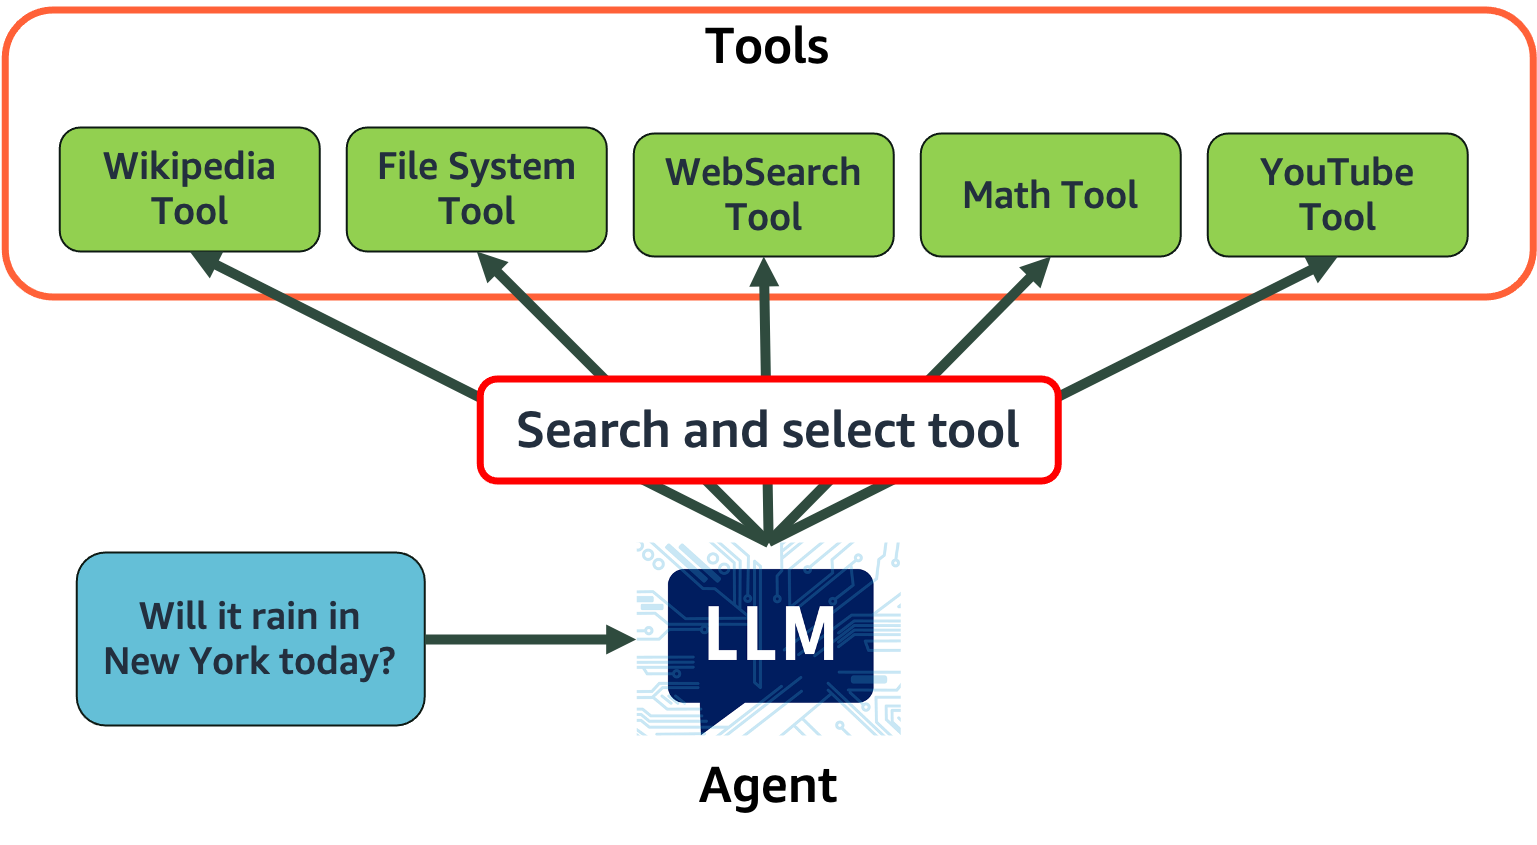
</div>

The last example shows how an agent uses the `PythonREPL` tool to write python code and execute it to obtain the desired results.
In the next demonstration, let's use an agent which has access to more than one tool and is required to perform the following tasks:
- Reason and select the relevant tool based on the prompt
- Create the query for the selected tool to get the desired results
- Analyze the results and generate the correct answer in response to the prompt.

In [14]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent

# Define a list of available tools for the agent
tools = [
    wikipedia_tool,
    web_search_tool,
    pubmed_tool,
    math_tool[0],
    list_dir_tool,
    date_tool,
]

PREFIX = """Answer the following questions as best you can. You have access to the following tools:"""
FORMAT_INSTRUCTIONS = """Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: Select the tool by returning the name from the list [{tool_names}]. Do not provide parameters here.
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question"""
SUFFIX = """Begin!

Question: {input}
Thought:{agent_scratchpad}"""

agent = initialize_agent(
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    tools=tools,
    llm=bedrock_llm,
    verbose=True,
    handle_parsing_errors=True,
    agent_kwargs={
        'prefix':PREFIX,
        'format_instructions':FORMAT_INSTRUCTIONS,
        'suffix':SUFFIX
    }
)

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <p style="text-align:center;margin:auto;"><img src="./images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Try different prompts and observe the responses generated by the agent.</p>
    <p style=" text-align: center; margin: auto;"><b>Note: Results may not be factually accurate and may be based on false assumptions.</b></p>
    <br>
</div>


---

#### Automatically select and use the `DuckDuckGo` tool

Let's examine whether the agent is able to reason and select `DuckDuckGo` tool and the `DateTool` tool to respond about the weather conditions in New York.

In [15]:
agent.invoke({"input": "Should i carry an umbrella in New York City?"})



> Entering new AgentExecutor chain...
I need to know the weather in New York City.
Action: WebSearchTool
Action Input: weather in New York City
Observation: 
      Get the current weather and the 10-day outlook for New York, NY, including temperature, precipitation, air quality, and allergy information. See radar maps, hourly details, and sun and moon times for planning your activities.
    
      Get the current weather conditions and the outlook for the next 10 days in New York City. See the temperature, precipitation, wind, air quality, and allergy levels for each day.
    
      Hazardous Weather Conditions. Heat Advisory in effect from July 14, 12:00 PM EDT until July 15, 08:00 PM EDT; Current conditions at New York City, Central Park (KNYC) Lat: 40.78° N Lon: 73.97° W ... New York (Manhattan) County. This Afternoon. Partly sunny with a 20 percent chance of showers. Highs in the mid 80s.
    
      Hazardous Weather Conditions. Heat Advisory in effect from July 14, 12:00 PM EDT 

{'input': 'Should i carry an umbrella in New York City?',
 'output': 'There is a 30% chance of rain today in New York City.'}

---
#### Automatically select and use the `ListDirTool` tool

Let's examine whether the agent is able to reason and select `ListDirTool` tool to answer question about the current directory.

In [16]:
# Invoke the executor chain
agent.invoke({"input": "List all the files in the data directory."})



> Entering new AgentExecutor chain...
I need to list the contents of the data directory.
Action: ListDirTool
Action Input: data
Observation: d2l-textbook.pdf
Thought:I know the answer now.
Final Answer: d2l-textbook.pdf

> Finished chain.


{'input': 'List all the files in the data directory.',
 'output': 'd2l-textbook.pdf'}

---
#### Automatically select and use the `Wikipedia` tool

Let's examine whether the agent is able to reason and select `Wikipedia` tool to answer question about Sagemaker.

In [17]:
agent.invoke({"input": "Which company has a service called OpenSearch?"})



> Entering new AgentExecutor chain...
I need to know which company has a service called OpenSearch.
Action: WikipediaTool
Action Input: company with service called OpenSearch
Observation: Page: Elasticsearch
Summary: Elasticsearch is a search engine based on the Lucene library. It provides a distributed, multitenant-capable full-text search engine with an HTTP web interface and schema-free JSON documents. Elasticsearch is developed in Java and is dual-licensed under the (source-available) Server Side Public License and the Elastic license, while other parts fall under the proprietary (source-available) Elastic License. Official clients are available in Java, .NET (C#), PHP, Python, Ruby and many other languages. According to the DB-Engines ranking, Elasticsearch is the most popular enterprise search engine.

Page: Yandex
Summary: Yandex LLC (Russian: Яндекс, romanized: Yandeks, IPA: [ˈjandəks]) is a Russian multinational technology company providing Internet-related products and serv

{'input': 'Which company has a service called OpenSearch?', 'output': 'Amazon'}

---

### <a name="5">Quizzes</a>
(<a href="#0">Go to top</a>)

Well done on completing the lab! Now, it's time for a brief knowledge assessment.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <p style="text-align:center;margin:auto;"><img src="./images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Answer the following questions to test your understanding of using pre-trained LLMs for inference.</p>
    <br>
</div>


In [18]:
from mlu_utils.quiz_questions import *

lab4_question1

In [19]:
lab4_question2

<p style="padding: 10px; border: 1px solid black;">
<img src="images/MLU-NEW-logo.png" alt="drawing" width="400"/> <br/>

# Thank you!